# Preliminary Study

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data_path = "../data/analyze_bos"

/tmp/ipykernel_675/468678224.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
# Get the number of entries in each csv file in the data directory
file_entries = {}

for filename in os.listdir(data_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_path, filename)
        df = pd.read_csv(file_path)
        data_year = filename.split(".")[0].split("_")[-1]
        file_entries[data_year] = len(df)

/tmp/ipykernel_675/2812687726.py:7: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_675/2812687726.py:7: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_675/2812687726.py:7: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_675/2812687726.py:7: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_675/2812687726.py:7: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_675/2812687726.py:7: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(

2011: 58262 entries
2012: 118092 entries
2013: 142610 entries
2014: 147820 entries
2015: 210083 entries
2016: 216535 entries
2017: 251269 entries
2018: 262748 entries
2019: 259022 entries
2020: 251222 entries
2021: 273784 entries
2022: 276599 entries
2023: 313226 entries
2024: 35452 entries


<BarContainer object of 14 artists>

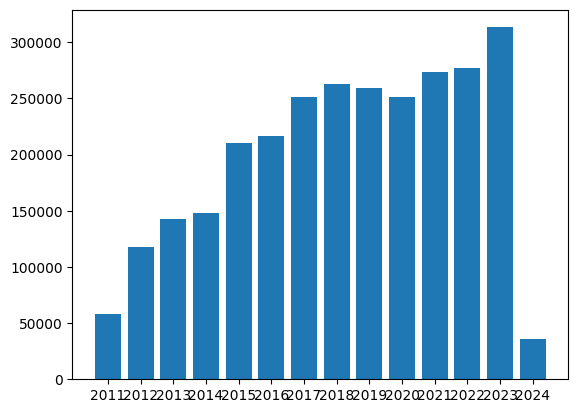

In [6]:
file_entries = dict(sorted(file_entries.items(), key=lambda item: item[0], reverse=False))
for filename, entries in file_entries.items():
    print(f"{filename}: {entries} entries")

# plot the number of entries in each csv file

plt.bar(file_entries.keys(), file_entries.values())

In [9]:
# In each file, get the number of entries contained "animal", "dog", "cat" or "rat" in the "reason" column.
# Get the number of entries of each keyword individually and plot the number of entries in each csv file.

keywords = ["animal", "dog", "cat", "rat"]
keyword_entries = {keyword: {} for keyword in keywords}

for filename in os.listdir(data_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_path, filename)
        df = pd.read_csv(file_path)
        data_year = filename.split(".")[0].split("_")[-1]
        for keyword in keywords:
            keyword_entries[keyword][data_year] = len(df[df["reason"].str.contains(keyword, case=False)])

for keyword in keywords:
    keyword_entries[keyword] = dict(sorted(keyword_entries[keyword].items(), key=lambda item: item[0], reverse=False))
    for filename, entries in keyword_entries[keyword].items():
        print(f"{keyword} in {filename}: {entries} entries")


/tmp/ipykernel_675/2434107630.py:10: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_675/2434107630.py:10: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_675/2434107630.py:10: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_675/2434107630.py:10: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_675/2434107630.py:10: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_675/2434107630.py:10: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.rea

animal in 2011: 0 entries
animal in 2012: 0 entries
animal in 2013: 404 entries
animal in 2014: 2718 entries
animal in 2015: 3168 entries
animal in 2016: 3012 entries
animal in 2017: 3036 entries
animal in 2018: 2979 entries
animal in 2019: 3508 entries
animal in 2020: 3239 entries
animal in 2021: 4106 entries
animal in 2022: 4031 entries
animal in 2023: 4155 entries
animal in 2024: 343 entries
dog in 2011: 0 entries
dog in 2012: 0 entries
dog in 2013: 0 entries
dog in 2014: 0 entries
dog in 2015: 0 entries
dog in 2016: 0 entries
dog in 2017: 0 entries
dog in 2018: 0 entries
dog in 2019: 0 entries
dog in 2020: 0 entries
dog in 2021: 0 entries
dog in 2022: 0 entries
dog in 2023: 0 entries
dog in 2024: 0 entries
cat in 2011: 513 entries
cat in 2012: 1316 entries
cat in 2013: 1458 entries
cat in 2014: 1422 entries
cat in 2015: 1263 entries
cat in 2016: 1223 entries
cat in 2017: 1298 entries
cat in 2018: 1417 entries
cat in 2019: 1253 entries
cat in 2020: 1261 entries
cat in 2021: 1319 ent

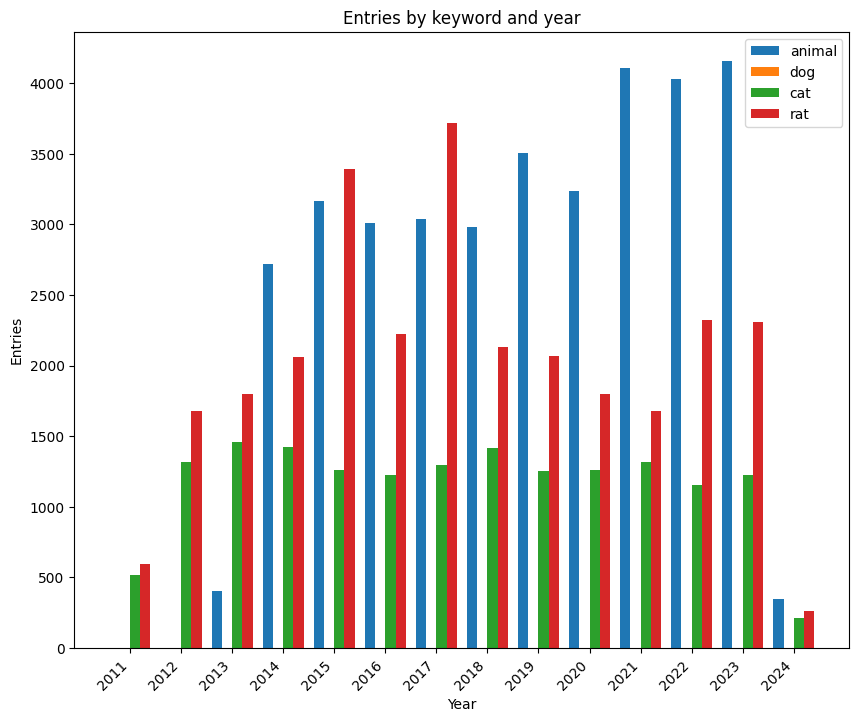

In [8]:

fig, ax = plt.subplots()
bar_width = 0.2
index = np.arange(len(file_entries))
for i, keyword in enumerate(keywords):
    ax.bar(index + i * bar_width, keyword_entries[keyword].values(), bar_width, label=keyword)

ax.set_xlabel('Year')
ax.set_ylabel('Entries')
ax.set_title('Entries by keyword and year')
ax.set_xticks(index + bar_width * (len(keywords) - 1) / 2)
ax.set_xticklabels(file_entries.keys())
ax.legend()
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate labels to 45 degrees and align right
fig.set_size_inches(10, 8)  # Width, Height in inches
plt.show()
